In [4]:
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D ,BatchNormalization


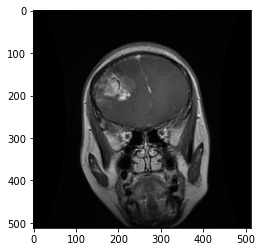

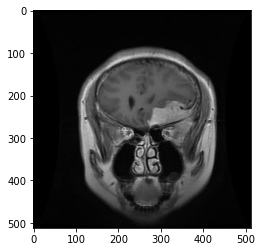

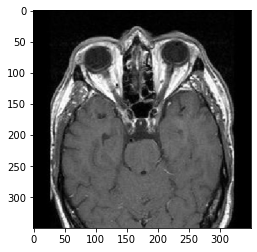

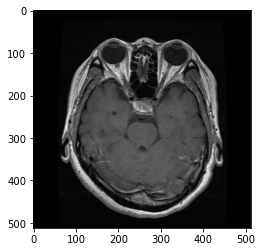

In [5]:
file = "E:/SelectedDataset#3/Training"
CATEGORIES = ["glioma","meningioma","notumor","pituitary"]
for category in CATEGORIES:
  path = os.path.join(file, category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img))
    plt.imshow(img_array)
    plt.show()
    break

In [89]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
                        rescale = 1.0/255., validation_split=0.32)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1.0/255.,)
train_generator = train_datagen.flow_from_directory("E:/SelectedDataset#3/AllInOne",
                                                    batch_size = 10,
                                                    class_mode = 'categorical',
                                                    shuffle = True,
                                                    color_mode= 'grayscale',
                                                    subset ='training',
                                                    seed=32,
                                                    target_size = (128, 128) )
test_generator = train_datagen.flow_from_directory("E:/SelectedDataset#3/AllInOne",
                                                    batch_size = 10,
                                                    class_mode = 'categorical',
                                                   color_mode= 'grayscale',
                                                    shuffle = True,
                                                    seed=32,
                                                    subset ='validation',
                                                    target_size = (128, 128))

Found 4777 images belonging to 4 classes.
Found 2246 images belonging to 4 classes.


In [90]:

model = Sequential ()

model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same',  activation ='relu', input_shape = (128,128,1)))
model.add(BatchNormalization(axis=-1,
    momentum=0.99,
    epsilon=0.001,
    center=True,
    scale=True,
    beta_initializer="zeros",
    gamma_initializer="ones",
    moving_mean_initializer="zeros",
    moving_variance_initializer="ones",
    beta_regularizer=None,
    gamma_regularizer=None,
    beta_constraint=None,
    gamma_constraint=None))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 32, kernel_size = (2,2),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256, activation = "relu"))

model.add(Dense(4, activation = "softmax"))

In [91]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_50 (Conv2D)          (None, 128, 128, 8)       208       
                                                                 
 batch_normalization_10 (Bat  (None, 128, 128, 8)      32        
 chNormalization)                                                
                                                                 
 max_pooling2d_49 (MaxPoolin  (None, 64, 64, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_51 (Conv2D)          (None, 64, 64, 16)        1168      
                                                                 
 max_pooling2d_50 (MaxPoolin  (None, 32, 32, 16)       0         
 g2D)                                                            
                                                     

In [92]:
opt= tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer = opt , loss = "categorical_crossentropy", metrics=["accuracy"])




In [93]:
history = model.fit(
    train_generator,
    validation_data = test_generator,
    epochs =10,
    verbose =2
)

Epoch 1/10
478/478 - 53s - loss: 0.6537 - accuracy: 0.7574 - val_loss: 0.8501 - val_accuracy: 0.6447 - 53s/epoch - 110ms/step
Epoch 2/10
478/478 - 47s - loss: 0.3878 - accuracy: 0.8417 - val_loss: 0.5881 - val_accuracy: 0.7569 - 47s/epoch - 98ms/step
Epoch 3/10
478/478 - 45s - loss: 0.3203 - accuracy: 0.8731 - val_loss: 0.4541 - val_accuracy: 0.8077 - 45s/epoch - 94ms/step
Epoch 4/10
478/478 - 45s - loss: 0.2683 - accuracy: 0.8976 - val_loss: 0.4397 - val_accuracy: 0.8299 - 45s/epoch - 93ms/step
Epoch 5/10
478/478 - 44s - loss: 0.2004 - accuracy: 0.9202 - val_loss: 0.3901 - val_accuracy: 0.8575 - 44s/epoch - 92ms/step
Epoch 6/10
478/478 - 49s - loss: 0.1631 - accuracy: 0.9385 - val_loss: 0.3810 - val_accuracy: 0.8664 - 49s/epoch - 103ms/step
Epoch 7/10
478/478 - 46s - loss: 0.1491 - accuracy: 0.9426 - val_loss: 0.3619 - val_accuracy: 0.8736 - 46s/epoch - 97ms/step
Epoch 8/10
478/478 - 46s - loss: 0.1273 - accuracy: 0.9521 - val_loss: 0.3430 - val_accuracy: 0.8709 - 46s/epoch - 96ms/ste

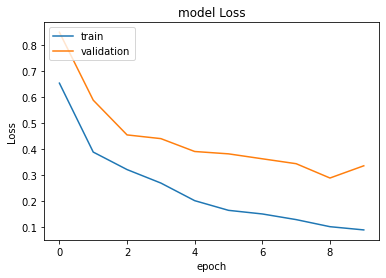

In [94]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model Loss')
plt.ylabel('Loss') 
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

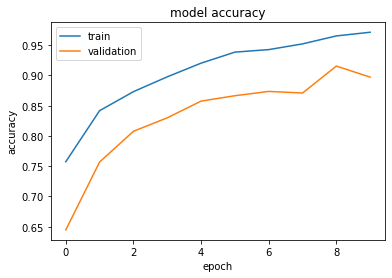

In [95]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy') 
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [96]:
import numpy as np

from tqdm import tqdm
train_generator.reset()
X_test, y_test = next(train_generator)
for i in tqdm(range(int(len(train_generator)/10)-1)): 
        img, label = next(train_generator)
        X_test = np.append(X_test, img, axis=0 )
        y_test = np.append(y_test, label, axis=0)


100%|██████████████████████████████████████████████████████████████████████████████████| 46/46 [00:01<00:00, 36.19it/s]


In [97]:
y_pred = model.predict(X_test)

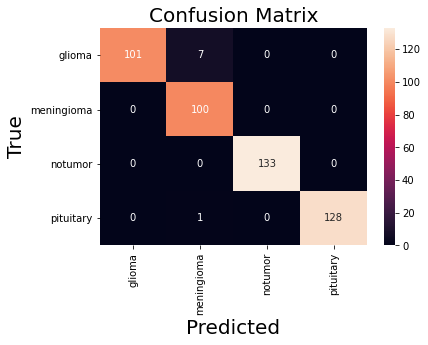

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       108
           1       0.93      1.00      0.96       100
           2       1.00      1.00      1.00       133
           3       1.00      0.99      1.00       129

    accuracy                           0.98       470
   macro avg       0.98      0.98      0.98       470
weighted avg       0.98      0.98      0.98       470



In [99]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns

predictions = model.predict(X_test, steps=len(X_test), verbose=0)
y_pred = np.argmax(predictions, axis=-1)
y_true=np.argmax(y_test, axis=-1)


cm = confusion_matrix(y_true, y_pred)
class_names = ["glioma","meningioma","notumor","pituitary"]

# Plot confusion matrix in a beautiful manner
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(class_names, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(class_names, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Confusion Matrix', fontsize=20)


plt.show()
print('Classification Report')
print(classification_report(y_true, y_pred))

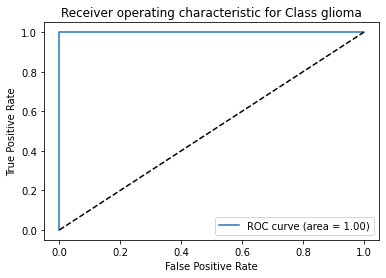

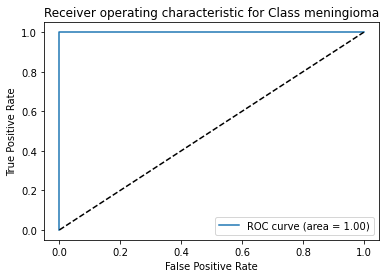

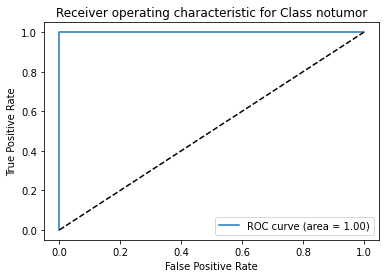

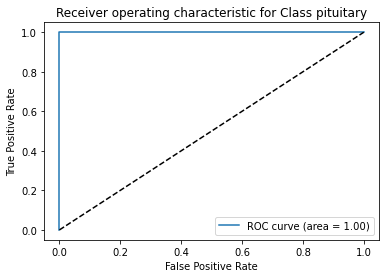

In [102]:

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
y_pred = model.predict (X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
class_names = ["glioma","meningioma","notumor","pituitary"]

for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

for i in range(4):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver operating characteristic for Class {class_names[i]}')
    plt.legend(loc="lower right")
    plt.show()